In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import re

from googletrans import Translator

In [2]:
df_train = pd.read_csv('Data_Train.csv')
df_test = pd.read_csv('Data_Test.csv')

In [3]:
df_train.shape

(78458, 11)

In [4]:
df_test.shape

(19615, 10)

In [5]:
df_train.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


In [6]:
df = pd.concat([df_train,df_test])

In [7]:
df.shape

(98073, 11)

In [8]:
df_test.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Comments,Likes,Popularity,Followers
0,562546,L2Share♫79,all-music,AU,엔플라잉 N.Flying - Rooftop (옥탑방),2019-01-02 09:49:19.000000,26,"5,428",118,2568
1,907584,Morgan Page,danceedm,AU,Morgan Page - In The Air - Episode 246,2015-03-09 17:30:10.000000,18,738,195,155645
2,213013,Dirty Workz,danceedm,AU,Outlander - Devotion (Official HQ Preview),2013-09-18 16:09:03.000000,18,386,96,29446
3,340312,Gucci Mane,all-music,AU,Freaky Gurl,2007-08-14 00:00:00.000000,1,388,19,799410
4,41854,Angga Kecap,rock,AU,Radical Nusantara - Teman,2018-08-10 16:28:54.000000,0,79,1,2


In [9]:
df_test.shape

(19615, 10)

In [10]:
df.head()

,Comments,Country,Followers,Genre,Likes,Name,Popularity,Song_Name,Timestamp,Unique_ID,Views
0,4,AU,119563,danceedm,499,Hardstyle,97,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,413890,14017.0
1,17,AU,2141,danceedm,49,Dj Aladdin,17,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,249453,1918.0
2,11,AU,22248,danceedm,312,Maxximize On Air,91,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,681116,9668.0
3,2,AU,393655,rbsoul,"2,400",GR6 EXPLODE,76,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,387253,113036.0
4,81,AU,201030,danceedm,"3,031",Tritonal,699,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,1428029,110024.0


In [11]:
df.shape

(98073, 11)

In [12]:
df.columns = df.columns.map(str.lower)

In [13]:
df.head()

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views
0,4,AU,119563,danceedm,499,Hardstyle,97,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,413890,14017.0
1,17,AU,2141,danceedm,49,Dj Aladdin,17,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,249453,1918.0
2,11,AU,22248,danceedm,312,Maxximize On Air,91,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,681116,9668.0
3,2,AU,393655,rbsoul,"2,400",GR6 EXPLODE,76,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,387253,113036.0
4,81,AU,201030,danceedm,"3,031",Tritonal,699,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,1428029,110024.0


In [14]:
df[df.song_name.isna()]

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views
31398,540,AU,440088,electronic,705,San Holo,178,NaN,2015-01-17 23:57:50.000000,1240617,128906.0


In [15]:
song_name_conter = Counter(df.loc[df.name == 'San Holo'].song_name)

In [16]:
# song_name_conter

In [17]:
song_name = df.loc[df.name == 'San Holo'].song_name.mode()[0]

In [18]:
df[df.song_name.isna()]

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views
31398,540,AU,440088,electronic,705,San Holo,178,NaN,2015-01-17 23:57:50.000000,1240617,128906.0


In [19]:
df.song_name.fillna(song_name,inplace=True)

In [20]:
df.song_name.isna().sum()

0

In [21]:
df.isna().sum()

comments          0
country           0
followers         0
genre             0
likes             0
name              0
popularity        0
song_name         0
timestamp         0
unique_id         0
views         19615
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 0 to 19614
Data columns (total 11 columns):
comments      98073 non-null int64
country       98073 non-null object
followers     98073 non-null int64
genre         98073 non-null object
likes         98073 non-null object
name          98073 non-null object
popularity    98073 non-null object
song_name     98073 non-null object
timestamp     98073 non-null object
unique_id     98073 non-null int64
views         78458 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 9.0+ MB


In [23]:
df.country.unique()

array(['AU'], dtype=object)

In [24]:
df.genre.unique()

array(['danceedm', 'rbsoul', 'all-music', 'trap', 'latin', 'electronic',
       'deephouse', 'hiphoprap', 'classical', 'ambient', 'pop', 'rock',
       'reggaeton', 'country', 'disco', 'alternativerock', 'dubstep',
       'drumbass', 'metal', 'folksingersongwriter', 'indie'], dtype=object)

In [25]:
df.head()

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views
0,4,AU,119563,danceedm,499,Hardstyle,97,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,413890,14017.0
1,17,AU,2141,danceedm,49,Dj Aladdin,17,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,249453,1918.0
2,11,AU,22248,danceedm,312,Maxximize On Air,91,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,681116,9668.0
3,2,AU,393655,rbsoul,"2,400",GR6 EXPLODE,76,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,387253,113036.0
4,81,AU,201030,danceedm,"3,031",Tritonal,699,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,1428029,110024.0


In [26]:
name_counter = Counter(df.name)

In [27]:
name_counter

Counter({'Hardstyle': 1422,
         'Dj Aladdin': 30,
         'Maxximize On Air': 193,
         'GR6 EXPLODE': 1747,
         'Tritonal': 342,
         'k$upreme': 60,
         'Diplo': 295,
         'Nick Vanelli': 310,
         'DeejayEcko(PNCS)': 38,
         'TWOLOUD': 125,
         'Revealed Recordings': 550,
         'WB x MB': 140,
         'No Mana': 65,
         'MMNC': 42,
         'Monstercat': 1773,
         'AC Slater': 124,
         'ROJAS': 40,
         'trndmsk': 1040,
         'Aminé': 49,
         'promocionesfreddy': 442,
         'pmrecordings': 90,
         'Cat Dealers': 55,
         'Morgan Page': 602,
         'DJ GUI MARQUES': 110,
         'Angel': 143,
         'Corridos Delux': 257,
         'MrSuicideSheep': 866,
         'Resident Advisor': 997,
         '_lynx1337': 62,
         'MAC AYRES': 35,
         'COLOVE Products': 32,
         'Uprise Music': 219,
         'LEGENDA FUNK': 914,
         'Uptempo HC Channel': 1003,
         'Atlantic Records': 37

In [28]:
df.loc[df.name == 'شعبي ساوند','name'] = 'Popular Sound'

In [29]:
# df.loc[df.song_name.str.contains('مهرجان مستر تعبان مهرجانات تيم حريف شعبى'),'name'] = 'Mister Taaban Festival festivals Tim Charif popular'


In [30]:
df.loc[df.name == 'Popular Sound'].song_name.unique()

array(['الحوت الحقيقى ديس على اليوتيوبرز - رد على ديس محمد خالد - عمرو سايكو Amr Saiko',
       "Oka Wi Ortega.Lo3't El 3ioon اوكا واورتيجا . لغة العيون",
       'مزمارالقناصه بطلعات شديدة اوى 2019 للعالمي محمد اوشه حظ شعبي 2019',
       'مهرجان مستر تعبان مهرجانات تيم حريف شعبى 2019',
       'مهرجان اللى بيشتكى مننا - الصواريخ دقدق و فانكى - ELY BYSHTKY MENNA El Sawareekh 2019',
       'مهرجان بت ومشيت بمزاجها بندق - حوده ناصر - تيتو - توني مهرجانات 2019',
       'مهرجان الطيبة جريمة حمو بيكا الجديد 2019 مودي امين توزيع باسل السوهاجي',
       'مهرجان هنشلف عليكم غناء حمو بيكا وميسره توزيع يوسف الجن ريمكس',
       'مهرجان تيك توك غناء و توزيع الهامي روميو',
       'مهرجان على بيه مظهر -مانو الدبابه - توزيع الخضرى - مهرجانات 2019',
       'محمد مزيكا 2019 موال نسيت العذاب',
       'Magdy Shata - Mahadesh Fina No.1 مجدي شطه - محدش فينا نمبرون - مجدي شطه',
       'مهرجان جوزنى بنتك ياعم الحج - حمو بيكا - على قدوره توزيع فيجو الدخلاوى',
       'مهرجان بابا المجال و بجداره مهرجانات 2019 غنا

In [31]:
# df.loc[df.song_name.str.contains('مزمارالقناصه بطلعات شديدة اوى 2019 للعالمي محمد اوشه حظ شعبي'),'name'] = 'Sniper rifle with strong ambitions, 2019, for the world footballer Mohammed Oshh, popular luck'
# df.loc[df.song_name == 'مهرجان مستر تعبان مهرجانات تيم حريف شعبى','name'] = 'Mister Taaban Festival festivals Tim Charif popular'
# df.loc[df.song_name == 'مهرجان بت ومشيت بمزاجها بندق - حوده ناصر - تيتو - توني مهرجانات','name'] = 'Bit Festival and I walked with her mood Hazel - Hoda Nasser - Tito - Tony Festivals'
# df.loc[df.song_name == 'مهرجان الطيبة جريمة حمو بيكا الجديد 2019 مودي امين توزيع باسل السوهاجي','name'] = 'The Good Festivals Festival, Hamo Beca New 2019 Modi Moderator, Basil Al-Suhagy'
# df.loc[df.song_name == 'مهرجان هنشلف عليكم غناء حمو بيكا وميسره توزيع يوسف الجن ريمكس','name'] = 'We will celebrate the singing of Hamu Beca and his facilitator. The distribution of Youssef El Jin Remix'
# df.loc[df.song_name == 'مهرجان تيك توك غناء و توزيع الهامي روميو','name'] = 'The Tic Tac Festival is a rhyming vocals and vocals'
# df.loc[df.song_name.str.contains('مهرجان على بيه مظهر -مانو الدبابه - توزيع الخضرى - مهرجانات'),'name'] = 'Ali Bey Mazhar Festival - Manu Al-Dabbabah - Al-Khudari Distribution - Festivals'
# df.loc[df.song_name == 'محمد مزيكا 2019 موال نسيت العذاب','name'] = 'Mohamed Mazzika 2019 Mawal forgot the agony'
# df.loc[df.song_name == 'مهرجان جوزنى بنتك ياعم الحج - حمو بيكا - على قدوره توزيع فيجو الدخلاوى','name'] = 'The Jawzni Bentek Festival in Hajj - Hamou Beca - is due to its ability to distribute Figo Dakhlawi'
# df.loc[df.song_name == 'مهرجان بابا المجال و بجداره مهرجانات 2019 غناء علاء فيفتى - عنبة - دوبى توزيع مولوتوف','name'] = 'Baba Al-Majal Festival and with its wall festivals'
# df.loc[df.song_name.str.contains('مهرجانات 2019 مهرجان الـ 10 نصايح 2019 شواحه - حلقولو توزيع زيزو المايسترو'),'name'] = 'Festivals 2019 The 10 Tips Festival 2019 Shwah - Chalkulu, the distribution of the Zizo Maestro'

# df.loc[df.name == '','name'] = 'My people sound'
# df.loc[df.name == '','name'] = 'My people sound'







In [32]:
# df.loc[df.song_name.str.contains('مهرجان بت ومشيت بمزاجها بندق - حوده ناصر - تيتو - توني مهرجانات'),'name'] = 'Bit Festival and I walked with her mood Hazel - Hoda Nasser - Tito - Tony Festivals'

In [33]:
df.loc[df.name.str.contains('ميوزك مهرجانات'),'name'] = 'Music festivals'
df.loc[df.name == '仙水風楽','name'] = 'Sensui Kazeraku'

In [34]:
df.loc[df.name.str.contains('Music Mhragnat')]

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views


In [35]:
df.loc[df.name == 'Sensui Kazeraku'].song_name.unique()

array(['Last Battle -asellus-', 'Nの城', '夢の跡地', '嵐に舞う黒い影 /クシャルダオラ',
       '栄光への戦い', 'VS.マルク', '戦火を交えて', '決戦！N', '炎国の王妃 /テオ・テスカトル & ナナ・テスカトリ',
       '不死身の敵に挑む', 'アンパンマンのマーチ ラスボス風アレンジ', 'リュウラセンの塔', '死の塔',
       '戦闘！ソルガレオ ルナアーラ ネクロズマ', 'ハイリンク', '戦闘！スイクン', '戦闘！チャンピオン（下北沢）',
       'デデドン(絶望)', 'J - E-N - O-V - A', '数式に囚われた者', 'ビッグブリッヂの死闘',
       'おどるポンポコリン ラスボス風アレンジ'], dtype=object)

In [36]:
translator = Translator()

In [37]:
def googleTranslate(text_value):
    
    words = translator.translate(text_value ,dest='en')
    return words.text
    

In [38]:
df.loc[df.name == 'Sensui Kazeraku']

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views
8217,0,AU,125,all-music,3,Sensui Kazeraku,0,Last Battle -asellus-,2018-06-09 07:35:03.000000,1561748,244.0
17798,0,AU,125,all-music,2,Sensui Kazeraku,0,Nの城,2018-06-10 13:03:56.000000,1561746,783.0
19460,0,AU,125,all-music,3,Sensui Kazeraku,1,夢の跡地,2018-06-25 10:04:19.000000,1561742,276.0
24699,0,AU,125,all-music,7,Sensui Kazeraku,0,嵐に舞う黒い影 /クシャルダオラ,2018-06-08 13:54:41.000000,1561750,344.0
28325,0,AU,125,all-music,6,Sensui Kazeraku,0,栄光への戦い,2018-07-06 08:53:05.000000,1561739,246.0
29142,0,AU,125,all-music,8,Sensui Kazeraku,1,VS.マルク,2018-08-11 07:26:04.000000,1561732,822.0
32732,1,AU,125,all-music,5,Sensui Kazeraku,1,戦火を交えて,2018-07-25 06:31:35.000000,1561734,505.0
40883,0,AU,125,all-music,9,Sensui Kazeraku,0,決戦！N,2018-06-14 12:26:37.000000,1561744,449.0
41960,0,AU,125,all-music,6,Sensui Kazeraku,0,炎国の王妃 /テオ・テスカトル & ナナ・テスカトリ,2018-06-15 09:33:34.000000,1561743,367.0
43206,0,AU,125,all-music,2,Sensui Kazeraku,0,不死身の敵に挑む,2018-07-16 01:04:39.000000,1561738,373.0


In [39]:
df.loc[df.name == 'Sensui Kazeraku','song_name'] = df.loc[df.name == 'Sensui Kazeraku'].song_name.apply(googleTranslate)

In [40]:
df.loc[df.name == 'Popular Sound','song_name'] = df.loc[df.name == 'Popular Sound'].song_name.apply(googleTranslate)

In [42]:
df.loc[df.name == 'Music festivals'].song_name.unique()

array(['اجدد مهرجانات اوكا&اورتيجا 2019 - مهرجان لغة العيون 👀❤️ - Oka Wi Ortega 2019',
       'مهرجان حقي عاش حمو بيكا - مودى امين - توزيع فيجو الدخلاوى 2018',
       'المهرجان اللى هيجيب تراند فى يوم - مهرجان دنيا تانيه 2019 احمد & الطايش - هيوولع مصر',
       'El Joker Ft. Sam - Enfsam 7ad Part 2 L احمد الجوكر و سام - إنفصام حاد الجزء الثانى',
       'مهرجان جوزني بنتك يا عم الحج علي قدورة - حمو بيكا توزيع فيجو الدخلاوي',
       'الدخلاوية - مهرجان قصف جبهة - فيلو - شاعر الغنية - مهرجانات 2018',
       'مهرجان - حظي قليل - حمو بيكا - على قدورة - مودي امين - توزيع فيجو الدخلاوى 2019 -',
       '2019اجدد مهرجانات المدفعجية 2019 - مهرجان هاتولي حد كبير اكلمو - المدفعجية',
       'اجدد مهرجانات فريق الاحلام - مهرجان الكدابين كترو - زيزو النوبى - بنوا - الشبح -2019',
       'مهرجان عيون الشر - بيكا & مودي امين & نور التوت - توزيع فيجو الدخلاوي 2018 النسخه الاصليه',
       'اغنية حزينة جدا 2019 اغنية حبك كدب مصطفى جابر - اغاني رومانسية حزينة 2019',
       'مهرجان هافانا - المافيا تيم - انت

In [43]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'[^\w]', ' ', text)
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

In [44]:
# df.loc[df.name == 'Music festivals','song_name'].apply(clean_text)

In [45]:
df.loc[df.name == 'Music festivals','song_name'].shape

(31,)

In [46]:
df.loc[df.name == 'Music festivals','song_name'] = df.loc[df.name == 'Music festivals'].song_name.apply(lambda x : re.sub(r'[^\w]', ' ', x))

In [47]:
df.loc[df.name == 'Music festivals','song_name'] = df.loc[df.name == 'Music festivals'].song_name.apply(googleTranslate)

In [48]:
# df.drop(df.loc[df.name == 'Music festivals'])

In [49]:
# df = df[~df.name.str.contains('Music festivals')] # Here i am dropping the the music festivals

In [50]:
df.head()

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views
0,4,AU,119563,danceedm,499,Hardstyle,97,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,413890,14017.0
1,17,AU,2141,danceedm,49,Dj Aladdin,17,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,249453,1918.0
2,11,AU,22248,danceedm,312,Maxximize On Air,91,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,681116,9668.0
3,2,AU,393655,rbsoul,"2,400",GR6 EXPLODE,76,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,387253,113036.0
4,81,AU,201030,danceedm,"3,031",Tritonal,699,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,1428029,110024.0


In [51]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)   
    text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
    text = re.sub(r'www.[^ ]+', '', text)  
    text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'[^\w]', ' ', text)
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

In [52]:
df['song_name'] = df.song_name.apply(clean_text)

In [53]:
df.song_name

0        vitral presents bombsquad poison spitter snake...
1                     aladdin old school hip hop quick mix
2                  maxximize air mixed blasterjaxx episode
3                                   yago tenho compromisso
4                                  escape feat steph jones
                               ...                        
19610                               jordan burns your mind
19611         sjammienators system overload komplex rumble
19612       vermont paradigma wassermann krautramatrik mix
19613                          yheti metapod ominous combo
19614                               devin wild everlasting
Name: song_name, Length: 98073, dtype: object

In [54]:
song_counter = Counter(df.song_name)

In [55]:
song_counter

Counter({'vitral presents bombsquad poison spitter snakepit anthem': 1,
         'aladdin old school hip hop quick mix': 1,
         'maxximize air mixed blasterjaxx episode': 37,
         'yago tenho compromisso': 1,
         'escape feat steph jones': 1,
         'started off finessen prod oscar': 1,
         'coone universal language cyber remix': 1,
         'pick your poison feat kay figure remix': 1,
         '': 763,
         'chihuahua mixdown instagram': 1,
         'big bang radio episode podcast': 33,
         'olly james loax feat christina pasion love again out now': 1,
         'bang hands out now smashed beatz': 1,
         'mana anti social media': 1,
         'timekeeperz distance world illusion': 1,
         'joakim karud rock angel': 1,
         'memtrix blind light': 1,
         'rogue from the dust': 1,
         'big sean last slater remix': 1,
         'icy narco pollari ice prod rojas adam the track': 1,
         'kid simius planet the simius': 1,
         'said 

In [56]:
empty_songs = df.loc[df.song_name == '']

In [57]:
empty_songs

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views
8,0,AU,1892,trap,28,Nick Vanelli,7,,2018-11-29 22:37:07.000000,967409,1263.0
219,14,AU,2165852,electronic,"1,296",Flume,156,,2016-11-25 00:00:00.000000,349035,127655.0
246,0,AU,1892,trap,28,Nick Vanelli,7,,2017-06-08 10:38:02.000000,967500,1645.0
371,0,AU,1892,trap,20,Nick Vanelli,7,,2017-04-18 09:26:11.000000,967521,1691.0
1048,0,AU,10,pop,1,Raul RM,0,,2018-06-07 22:38:52.000000,1140605,21.0
...,...,...,...,...,...,...,...,...,...,...,...
18983,1,AU,103,all-music,288,Ahmed Emad,5,,2019-01-02 17:19:18.000000,8,NaN
19026,639,AU,1758040,all-music,91.1K,BTS,"3,691",,2016-08-15 15:04:12.000000,86593,NaN
19113,52,AU,7919,all-music,113K,Sherine,"1,314",,2018-10-27 11:51:57.000000,1263910,NaN
19364,20,AU,1177595,all-music,17K,Kodak Black,"1,062",,2014-12-25 20:20:38.000000,532926,NaN


In [58]:
empty_song_counter = Counter([a for a in empty_songs.name])

In [59]:
empty_song_counter

Counter({'Nick Vanelli': 116,
         'Flume': 1,
         'Raul RM': 1,
         'BTS': 9,
         '21 Savage': 3,
         'elmagnon': 29,
         'Vũ,': 4,
         'Resident Advisor': 15,
         'Jhené Aiko': 3,
         'galaxy music ✪': 11,
         'Flosstradamus': 1,
         'FACT': 16,
         'moogmusicinc': 10,
         'Lumar Perez': 1,
         'Touliver': 5,
         'Тима Белорусских': 17,
         'Johnny singer 81': 96,
         'partyomo': 1,
         'MOHAMED HALIM ✪': 11,
         'Trap': 2,
         'VINXEN🇰🇷': 11,
         'KIRA': 4,
         'FACE': 3,
         'Music': 7,
         'Adam Amin': 20,
         "Ujico*/Snail's House": 6,
         'PHARAOH': 2,
         'Acid Pauli': 3,
         'Mohamed Abkarino': 8,
         '☠️SʜᴀʀᴀX Oғғɪᴄɪᴀʟ☠️': 19,
         'boppin™': 1,
         'YG': 1,
         'Machinedrum': 1,
         'Kontrabandz': 3,
         'Moon': 2,
         'Legado 7': 4,
         'DjTennis': 1,
         'entai': 4,
         'Fresh Music': 10,

In [60]:
# empty_songs.song_name.

SyntaxError: invalid syntax (<ipython-input-60-b8951cbd90b4>, line 1)

In [62]:
empty_songs.name

8        Nick Vanelli
219             Flume
246      Nick Vanelli
371      Nick Vanelli
1048          Raul RM
             ...     
18983      Ahmed Emad
19026             BTS
19113         Sherine
19364     Kodak Black
19389       hongkhanh
Name: name, Length: 763, dtype: object

In [63]:
df.loc[df.name == 'Nick Vanelli'].max()[7]

'yacht muzik free download'

In [64]:
def fillSongName(text):
   return df.loc[df.name == text].max()[7]

In [65]:
empty_songs.song_name = empty_songs.name.apply(fillSongName)

In [66]:
empty_songs.loc[empty_songs.song_name == '']

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views
12926,14,AU,20,all-music,"8,725",Cốp Cốp,737,,2019-02-08 16:48:46.000000,1477925,739878.0
17293,0,AU,617,all-music,139,مهرجانات,1,,2018-09-30 20:54:33.000000,1480708,3813.0
23246,4,AU,119,all-music,"6,321",Robert Raafat,75,,2018-09-28 00:54:01.000000,1225770,190095.0
26662,586,AU,7919,all-music,359K,Sherine,"5,518",,2018-10-26 23:18:54.000000,1263915,8212243.0
28649,0,AU,617,all-music,80,مهرجانات,0,,2018-10-05 22:13:12.000000,1480707,2239.0
30253,3,AU,7919,all-music,526,Sherine,79,,2019-02-22 13:29:30.000000,1263907,4989.0
33741,0,AU,617,all-music,"1,143",مهرجانات,14,,2018-10-16 20:39:15.000000,1480706,31156.0
38526,66,AU,7919,all-music,102K,Sherine,"1,167",,2018-10-26 23:03:48.000000,1263917,2077354.0
47810,0,AU,617,all-music,115,مهرجانات,2,,2018-10-22 18:34:59.000000,1480705,3117.0
47855,3,AU,119,all-music,"3,127",Robert Raafat,30,,2018-10-09 18:34:48.000000,1225768,91051.0


In [67]:
df.loc[df.song_name == '','song_name'] = df.loc[df.song_name == ''].name.apply(fillSongName)

In [68]:
df.loc[df.song_name == '']

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views
12926,14,AU,20,all-music,"8,725",Cốp Cốp,737,,2019-02-08 16:48:46.000000,1477925,739878.0
17293,0,AU,617,all-music,139,مهرجانات,1,,2018-09-30 20:54:33.000000,1480708,3813.0
23246,4,AU,119,all-music,"6,321",Robert Raafat,75,,2018-09-28 00:54:01.000000,1225770,190095.0
26662,586,AU,7919,all-music,359K,Sherine,"5,518",,2018-10-26 23:18:54.000000,1263915,8212243.0
28649,0,AU,617,all-music,80,مهرجانات,0,,2018-10-05 22:13:12.000000,1480707,2239.0
30253,3,AU,7919,all-music,526,Sherine,79,,2019-02-22 13:29:30.000000,1263907,4989.0
33741,0,AU,617,all-music,"1,143",مهرجانات,14,,2018-10-16 20:39:15.000000,1480706,31156.0
38526,66,AU,7919,all-music,102K,Sherine,"1,167",,2018-10-26 23:03:48.000000,1263917,2077354.0
47810,0,AU,617,all-music,115,مهرجانات,2,,2018-10-22 18:34:59.000000,1480705,3117.0
47855,3,AU,119,all-music,"3,127",Robert Raafat,30,,2018-10-09 18:34:48.000000,1225768,91051.0


In [69]:
df.song_name = df.song_name.replace('',np.nan)

In [70]:
df[df.song_name.isna()]

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views
12926,14,AU,20,all-music,"8,725",Cốp Cốp,737,NaN,2019-02-08 16:48:46.000000,1477925,739878.0
17293,0,AU,617,all-music,139,مهرجانات,1,NaN,2018-09-30 20:54:33.000000,1480708,3813.0
23246,4,AU,119,all-music,"6,321",Robert Raafat,75,NaN,2018-09-28 00:54:01.000000,1225770,190095.0
26662,586,AU,7919,all-music,359K,Sherine,"5,518",NaN,2018-10-26 23:18:54.000000,1263915,8212243.0
28649,0,AU,617,all-music,80,مهرجانات,0,NaN,2018-10-05 22:13:12.000000,1480707,2239.0
30253,3,AU,7919,all-music,526,Sherine,79,NaN,2019-02-22 13:29:30.000000,1263907,4989.0
33741,0,AU,617,all-music,"1,143",مهرجانات,14,NaN,2018-10-16 20:39:15.000000,1480706,31156.0
38526,66,AU,7919,all-music,102K,Sherine,"1,167",NaN,2018-10-26 23:03:48.000000,1263917,2077354.0
47810,0,AU,617,all-music,115,مهرجانات,2,NaN,2018-10-22 18:34:59.000000,1480705,3117.0
47855,3,AU,119,all-music,"3,127",Robert Raafat,30,NaN,2018-10-09 18:34:48.000000,1225768,91051.0


In [71]:
df.dropna(axis=0,subset=['song_name'],inplace=True)

In [72]:
df['song_name_num_words'] = df.song_name.apply(lambda a: len(str(a).split()))

In [73]:
df['song_name_unique_words'] = df.song_name.apply(lambda b : len(set(str(b).split())))

In [74]:
df['song_name_charac_words'] = df.song_name.apply(lambda c: len(str(c)))

In [75]:
df['song_name_mean_word_len'] = df.song_name.apply(lambda h : np.mean([len(a) for a in str(h).split()]))

In [76]:
# df.dropna(subset=['song_name'],axis=0,inplace=True)

In [77]:
df[df.song_name.isna()]

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98048 entries, 0 to 19614
Data columns (total 15 columns):
comments                   98048 non-null int64
country                    98048 non-null object
followers                  98048 non-null int64
genre                      98048 non-null object
likes                      98048 non-null object
name                       98048 non-null object
popularity                 98048 non-null object
song_name                  98048 non-null object
timestamp                  98048 non-null object
unique_id                  98048 non-null int64
views                      78440 non-null float64
song_name_num_words        98048 non-null int64
song_name_unique_words     98048 non-null int64
song_name_charac_words     98048 non-null int64
song_name_mean_word_len    98048 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 12.0+ MB


In [79]:
df['popularity'] = df.popularity.str.replace(',','')

In [80]:
df.head(10)

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len
0,4,AU,119563,danceedm,499,Hardstyle,97,vitral presents bombsquad poison spitter snake...,2018-03-30 15:24:45.000000,413890,14017.0,7,7,56,7.142857
1,17,AU,2141,danceedm,49,Dj Aladdin,17,aladdin old school hip hop quick mix,2016-06-20 05:58:52.000000,249453,1918.0,7,7,36,4.285714
2,11,AU,22248,danceedm,312,Maxximize On Air,91,maxximize air mixed blasterjaxx episode,2015-05-08 17:45:59.000000,681116,9668.0,5,5,39,7.000000
3,2,AU,393655,rbsoul,"2,400",GR6 EXPLODE,76,yago tenho compromisso,2017-06-08 23:50:03.000000,387253,113036.0,3,3,22,6.666667
4,81,AU,201030,danceedm,"3,031",Tritonal,699,escape feat steph jones,2016-09-17 20:50:19.000000,1428029,110024.0,4,4,23,5.000000
5,6,AU,71038,all-music,"4,500",k$upreme,325,started off finessen prod oscar,2017-11-27 14:55:11.000000,2839,223716.0,5,5,31,5.400000
6,15,AU,119563,danceedm,"1,017",Hardstyle,226,coone universal language cyber remix,2016-01-22 17:23:26.000000,414871,37480.0,5,5,36,6.400000
7,5,AU,7120051,danceedm,88,Diplo,12,pick your poison feat kay figure remix,2012-01-17 00:00:00.000000,209496,4022.0,7,7,38,4.571429
8,0,AU,1892,trap,28,Nick Vanelli,7,yacht muzik free download,2018-11-29 22:37:07.000000,967409,1263.0,4,4,25,5.500000
9,0,AU,2835,latin,622,DeejayEcko(PNCS),47,chihuahua mixdown instagram,2017-09-28 04:07:47.000000,171948,27874.0,3,3,27,8.333333


In [81]:
def clean_popularity(text):
    text = text.lower()
#     text = re.sub(r'[^\w]', '',text)
    if '.' in text and 'k' in text:
        text = text.replace('k','00')
    elif 'k' in text:
        text = text.replace('k','000')
    return text

In [82]:
df.popularity = df.popularity.apply(clean_popularity)

In [83]:
df.popularity

0         97
1         17
2         91
3         76
4        699
        ... 
19610    341
19611    305
19612     12
19613    666
19614    141
Name: popularity, Length: 98048, dtype: object

In [84]:
popular_count = Counter([a for a in df.popularity])
popular_count

Counter({'97': 188,
         '17': 549,
         '91': 197,
         '76': 242,
         '699': 23,
         '325': 40,
         '226': 65,
         '12': 732,
         '7': 1171,
         '47': 333,
         '124': 125,
         '753': 17,
         '0': 8056,
         '64': 280,
         '179': 75,
         '78': 222,
         '453': 33,
         '3463': 5,
         '35': 366,
         '600': 23,
         '352': 45,
         '14': 640,
         '1': 3177,
         '6687': 1,
         '205': 91,
         '457': 35,
         '61': 275,
         '1453': 6,
         '148': 119,
         '417': 33,
         '3': 1696,
         '1118': 10,
         '42': 313,
         '37': 369,
         '9': 870,
         '4183': 2,
         '28': 397,
         '8': 966,
         '13.100': 11,
         '2': 2134,
         '4262': 2,
         '228': 65,
         '2464': 2,
         '11': 773,
         '539': 23,
         '1878': 5,
         '29': 421,
         '59': 302,
         '447': 26,
         '935': 

In [85]:
df.popularity = df.popularity.apply(lambda x : x.replace('.',''))

In [86]:
dff = df

In [87]:
dff.likes = dff.likes.apply(clean_popularity) # Here the value is clean and some value like 109000 is pending

In [88]:
df['popularity'] = df.popularity.astype('object').astype('int')

In [89]:
df.likes = df.likes.apply(lambda x : x.replace(',','')) 

In [90]:
df.likes = df.likes.apply(lambda x : x.replace('.',''))

In [91]:
df.loc[df.likes.str.contains('m')]

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len
3067,7545,AU,1474721,rbsoul,12m,TopDawgEnt,140000,kendrick lamar black friday,2015-11-27 21:49:34.000000,1402829,70803564.0,4,4,27,6.000000
4277,8091,AU,1177595,all-music,126m,Kodak Black,61000,too many years pnb rock prod gramm,2016-06-11 05:24:45.000000,532868,102679062.0,7,7,34,4.000000
4628,6072,AU,947100,rbsoul,137m,brysontiller,130000,bryson tiller don,2014-10-10 02:34:03.000000,116780,92769653.0,3,3,17,5.000000
7032,4421,AU,57078,latin,133m,RD Urbans Music ✅,59900,despacito luis fonsi daddy yankee,2015-02-16 21:18:19.000000,1140853,90341760.0,5,5,33,5.800000
7810,9844,AU,1458205,all-music,188m,Travis Scott,216000,wonderful the weeknd,2015-12-31 05:13:42.000000,1416989,125158080.0,3,3,20,6.000000
8895,35399,AU,274586,all-music,261m,LifeOfDesiigner,233000,desiigner panda prod menace,2015-12-15 04:52:28.000000,584622,183945499.0,4,4,27,6.000000
10868,16989,AU,113667,all-music,102m,16yrold,32300,sheck wes bamba prod yrold take daytrip,2017-06-16 20:16:46.000000,2087,72432324.0,7,7,39,4.714286
18713,45082,AU,4900250,pop,174m,johnlegend,324000,all,2013-10-03 15:43:07.000000,497337,131454078.0,1,1,3,3.000000
19003,5969,AU,206858,all-music,124m,Tee Grizzley,62000,from the the feat lil yachty,2017-03-16 19:40:57.000000,1362969,119699756.0,6,5,28,3.833333
19170,7419,AU,148143,pop,116m,HIGH ON MUSIC,127000,sheeran love with the coco hitimpulse remix,2015-03-07 11:27:55.000000,446585,84042119.0,7,7,43,5.285714


In [92]:
df.likes = df.likes.apply(lambda x : x.replace('m','000000'))

In [93]:
df.loc[df.unique_id == 413890]

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len
0,4,AU,119563,danceedm,499,Hardstyle,97,vitral presents bombsquad poison spitter snake...,2018-03-30 15:24:45.000000,413890,14017.0,7,7,56,7.142857


In [94]:
df.head()

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len
0,4,AU,119563,danceedm,499,Hardstyle,97,vitral presents bombsquad poison spitter snake...,2018-03-30 15:24:45.000000,413890,14017.0,7,7,56,7.142857
1,17,AU,2141,danceedm,49,Dj Aladdin,17,aladdin old school hip hop quick mix,2016-06-20 05:58:52.000000,249453,1918.0,7,7,36,4.285714
2,11,AU,22248,danceedm,312,Maxximize On Air,91,maxximize air mixed blasterjaxx episode,2015-05-08 17:45:59.000000,681116,9668.0,5,5,39,7.000000
3,2,AU,393655,rbsoul,2400,GR6 EXPLODE,76,yago tenho compromisso,2017-06-08 23:50:03.000000,387253,113036.0,3,3,22,6.666667
4,81,AU,201030,danceedm,3031,Tritonal,699,escape feat steph jones,2016-09-17 20:50:19.000000,1428029,110024.0,4,4,23,5.000000


In [95]:
df.genre.unique()

array(['danceedm', 'rbsoul', 'all-music', 'trap', 'latin', 'electronic',
       'deephouse', 'hiphoprap', 'classical', 'ambient', 'pop', 'rock',
       'reggaeton', 'country', 'disco', 'alternativerock', 'dubstep',
       'drumbass', 'metal', 'folksingersongwriter', 'indie'], dtype=object)

In [98]:
df.name.value_counts()

Mixmag              2598
Monstercat          1773
GR6 EXPLODE         1747
Hardstyle           1422
Sweet Musique       1229
                    ... 
Nguyễn Công Danh       1
Cabuizee VIPs          1
Dj J.Fernandez         1
YK Osiris              1
Ferdy                  1
Name: name, Length: 1213, dtype: int64

In [99]:
genre_num_col = df.genre.str.get_dummies()

In [100]:
df.name = df.name.apply(clean_text)

In [101]:
name_num_col = df.name.str.get_dummies()

In [102]:
name_num_col.head()

,aash mehta,ace aura,acid pauli,adam amin,add kim,adham seliman,adictos los corridos,adik,adriatique cercle,adventure club,...,yvng jalape,zaddyb,zcbeats,zedd,zimmer,zinay hernandez,zorillio tribalerio zorra mix,zpk,zubair dubai,zzz beats
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df.head()

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len
0,4,AU,119563,danceedm,499,hardstyle,97,vitral presents bombsquad poison spitter snake...,2018-03-30 15:24:45.000000,413890,14017.0,7,7,56,7.142857
1,17,AU,2141,danceedm,49,aladdin,17,aladdin old school hip hop quick mix,2016-06-20 05:58:52.000000,249453,1918.0,7,7,36,4.285714
2,11,AU,22248,danceedm,312,maxximize air,91,maxximize air mixed blasterjaxx episode,2015-05-08 17:45:59.000000,681116,9668.0,5,5,39,7.000000
3,2,AU,393655,rbsoul,2400,explode,76,yago tenho compromisso,2017-06-08 23:50:03.000000,387253,113036.0,3,3,22,6.666667
4,81,AU,201030,danceedm,3031,tritonal,699,escape feat steph jones,2016-09-17 20:50:19.000000,1428029,110024.0,4,4,23,5.000000


In [105]:
train_data_preprocessed = df.drop(['country','song_name','timestamp','unique_id'],axis='columns')


In [106]:
train_data_preprocessed = df.drop(['genre'],axis='columns')

In [107]:
train_data_preprocessed = df.drop(['name','song_name','timestamp','genre','country','unique_id'],axis=1)

In [108]:
dff = pd.concat([train_data_preprocessed,genre_num_col,name_num_col],axis=1)

In [109]:
dff.shape

(98048, 1188)

In [110]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98048 entries, 0 to 19614
Columns: 1188 entries, comments to zzz beats
dtypes: float64(2), int64(1185), object(1)
memory usage: 889.4+ MB


In [111]:
train_data_preprocessed = dff[dff['views'].notna()]

In [112]:
train_data_preprocessed.shape

(78440, 1188)

In [113]:
dff = pd.concat([df.drop(['name','song_name','timestamp','genre','country'],axis=1),genre_num_col,name_num_col],axis=1)

In [114]:
test_data_preprocessed = dff[dff['views'].isna()]

In [115]:
test_data_preprocessed.shape

(19608, 1189)

In [116]:
test_data_preprocessed.head()

,comments,followers,likes,popularity,unique_id,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len,...,yvng jalape,zaddyb,zcbeats,zedd,zimmer,zinay hernandez,zorillio tribalerio zorra mix,zpk,zubair dubai,zzz beats
0,26,2568,5428,118,562546,NaN,2,2,14,6.5,...,0,0,0,0,0,0,0,0,0,0
1,18,155645,738,195,907584,NaN,5,5,27,4.6,...,0,0,0,0,0,0,0,0,0,0
2,18,29446,386,96,213013,NaN,4,4,35,8.0,...,0,0,0,0,0,0,0,0,0,0
3,1,799410,388,19,340312,NaN,2,2,11,5.0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,79,1,41854,NaN,3,3,23,7.0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
train_data_preprocessed.astype('object').astype('int')

,comments,followers,likes,popularity,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len,all-music,...,yvng jalape,zaddyb,zcbeats,zedd,zimmer,zinay hernandez,zorillio tribalerio zorra mix,zpk,zubair dubai,zzz beats
0,4,119563,499,97,14017,7,7,56,7,0,...,0,0,0,0,0,0,0,0,0,0
1,17,2141,49,17,1918,7,7,36,4,0,...,0,0,0,0,0,0,0,0,0,0
2,11,22248,312,91,9668,5,5,39,7,0,...,0,0,0,0,0,0,0,0,0,0
3,2,393655,2400,76,113036,3,3,22,6,0,...,0,0,0,0,0,0,0,0,0,0
4,81,201030,3031,699,110024,4,4,23,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78453,19,143726,489,47,12221,2,2,13,6,0,...,0,0,0,0,0,0,0,0,0,0
78454,4,211419,292,100,8265,4,4,27,6,0,...,0,0,0,0,0,0,0,0,0,0
78455,1,1403057,157,31,3621,3,3,23,7,0,...,0,0,0,0,0,0,0,0,0,0
78456,24,143743,371,89,8896,4,4,20,4,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
test_data_preprocessed['likes'] = test_data_preprocessed['likes'].astype('object').astype('int')

In [119]:
test_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19608 entries, 0 to 19614
Columns: 1189 entries, comments to zzz beats
dtypes: float64(2), int64(1187)
memory usage: 178.0 MB


In [121]:
X = train_data_preprocessed.drop(['views'],axis=1)

In [122]:
X.shape

(78440, 1187)

In [123]:
Y = train_data_preprocessed['views']

In [141]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [142]:
linear = LinearRegression()
linear.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
linear.coef_

array([ 9.46600987e+02,  1.44248451e+00,  3.15882865e-01, ...,
       -8.30828824e+04,  3.35508507e+05,  2.04710885e+06])

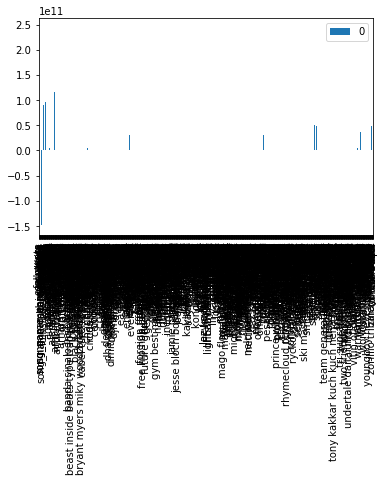

In [144]:
pd.DataFrame(linear.coef_,train_x.columns).plot(kind = "bar")

In [133]:
import matplotlib.pyplot as plt

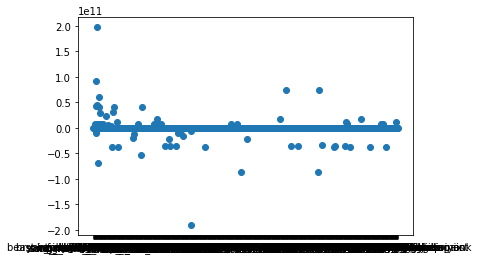

In [136]:
plt.scatter(train_x.columns,linear.coef_,marker='o')

In [145]:
train_predict = linear.predict(train_x)

In [146]:
test_predict = linear.predict(test_x)

In [147]:
np.sqrt(mean_squared_error(train_predict,train_y))

1585615.0125776792

In [148]:
np.sqrt(mean_squared_error(test_predict,test_y))

461062543.7066302

In [149]:
test_data_preprocessed.head()

,comments,followers,likes,popularity,unique_id,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len,...,yvng jalape,zaddyb,zcbeats,zedd,zimmer,zinay hernandez,zorillio tribalerio zorra mix,zpk,zubair dubai,zzz beats
0,26,2568,5428,118,562546,NaN,2,2,14,6.5,...,0,0,0,0,0,0,0,0,0,0
1,18,155645,738,195,907584,NaN,5,5,27,4.6,...,0,0,0,0,0,0,0,0,0,0
2,18,29446,386,96,213013,NaN,4,4,35,8.0,...,0,0,0,0,0,0,0,0,0,0
3,1,799410,388,19,340312,NaN,2,2,11,5.0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,79,1,41854,NaN,3,3,23,7.0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
test_data_preprocessed.head()

,comments,followers,likes,popularity,unique_id,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len,...,yvng jalape,zaddyb,zcbeats,zedd,zimmer,zinay hernandez,zorillio tribalerio zorra mix,zpk,zubair dubai,zzz beats
0,26,2568,5428,118,562546,NaN,2,2,14,6.5,...,0,0,0,0,0,0,0,0,0,0
1,18,155645,738,195,907584,NaN,5,5,27,4.6,...,0,0,0,0,0,0,0,0,0,0
2,18,29446,386,96,213013,NaN,4,4,35,8.0,...,0,0,0,0,0,0,0,0,0,0
3,1,799410,388,19,340312,NaN,2,2,11,5.0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,79,1,41854,NaN,3,3,23,7.0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
test_data_preprocessed.shape

(19608, 1189)

In [152]:
def model_fit(model, train_train_X, train_test_X, train_train_y, train_test_y, 
              train_X, train_y, test_X, filename ):
    model.fit(train_train_X,train_train_y)

    pd.DataFrame(model.coef_,train_train_X.columns).plot(kind = "bar")

    train_predict = model.predict(train_train_X)

    test_predict = model.predict(train_test_X)

    print("Train RMSE : ",np.sqrt(mean_squared_error(train_predict,train_train_y)))

    print("Test RMSE : ",np.sqrt(mean_squared_error(test_predict,train_test_y)))
    
    model.fit(train_X, train_y)
    
    test_hack_predict = model.predict(test_X.drop(['views','unique_id'],axis=1))
    print(test_hack_predict)
    
    test_pred_df = pd.DataFrame(test_hack_predict,columns= ['Views'])
    result = pd.concat([test_X[["unique_id"]],test_pred_df] ,axis = 1)
    result.rename(columns={'unique_id': 'Unique_ID'}, inplace=True)


#     result = test_pred_df
#     result.head()
    
    
#     result.to_csv(filename,index = False)
    
#     est['Price'] = np.round(np.expm1(x))
#     test.to_csv('lgb_' + cv_lgb + '.csv',index=False)
    from pandas import ExcelWriter
    writer = ExcelWriter('outputs/Sample_Submission.xlsx')
    result.to_excel(writer,'Sheet1')
    writer.save()
    
    

Train RMSE :  1585763.873694075
Test RMSE :  1629255.418215654
[559334.39274257  25996.88294733  47625.07079226 ...  10148.97091026
 209425.63297967  40343.27344477]


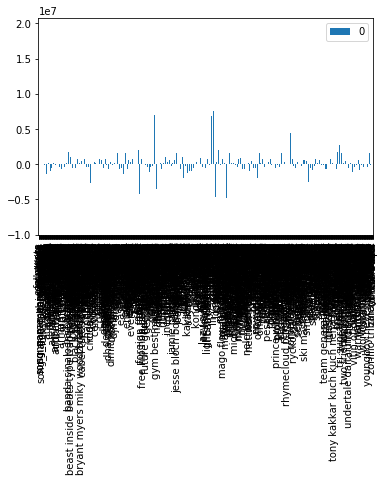

In [154]:
lass = Lasso(alpha=0.2, normalize=True)
model_fit(lass,train_x,test_x,train_y,test_y,X,Y,test_data_preprocessed,"lasso_solution.csv")

Train RMSE :  1668578.1786387104
Test RMSE :  1658156.6053422194
[593505.98165593  27982.31228777  36036.49099095 ...   9153.50976444
 212993.02152055  31763.95740586]


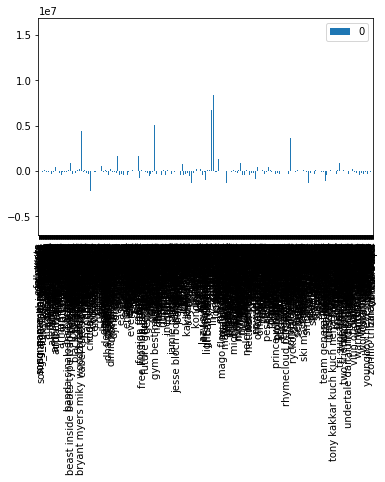

In [155]:
ridge = Ridge(alpha=0.3, normalize=True)
model_fit(ridge,train_x,test_x,train_y,test_y,X,Y,test_data_preprocessed,"ridge_solution.csv")

Train RMSE :  3700548.237136015
Test RMSE :  4277618.812280688
[546826.72248565 546644.19635391 546619.14836265 ... 546599.85332395
 546674.31019412 546637.06548643]


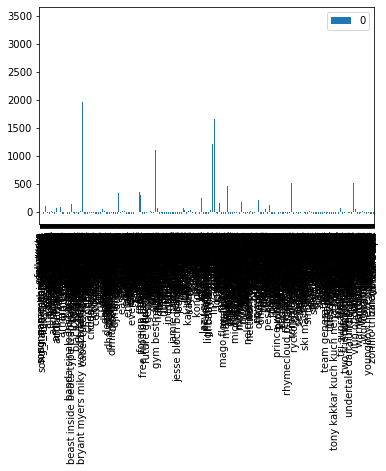

In [156]:
elastic = ElasticNet(alpha=0.3, l1_ratio=0.3, normalize=True)
model_fit(elastic,train_x,test_x,train_y,test_y,X,Y,test_data_preprocessed,"ridge_solution.csv")

In [157]:
dff.head()

,comments,followers,likes,popularity,unique_id,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len,...,yvng jalape,zaddyb,zcbeats,zedd,zimmer,zinay hernandez,zorillio tribalerio zorra mix,zpk,zubair dubai,zzz beats
0,4,119563,499,97,413890,14017.0,7,7,56,7.142857,...,0,0,0,0,0,0,0,0,0,0
1,17,2141,49,17,249453,1918.0,7,7,36,4.285714,...,0,0,0,0,0,0,0,0,0,0
2,11,22248,312,91,681116,9668.0,5,5,39,7.000000,...,0,0,0,0,0,0,0,0,0,0
3,2,393655,2400,76,387253,113036.0,3,3,22,6.666667,...,0,0,0,0,0,0,0,0,0,0
4,81,201030,3031,699,1428029,110024.0,4,4,23,5.000000,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df.head()

,comments,country,followers,genre,likes,name,popularity,song_name,timestamp,unique_id,views,song_name_num_words,song_name_unique_words,song_name_charac_words,song_name_mean_word_len
0,4,AU,119563,danceedm,499,hardstyle,97,vitral presents bombsquad poison spitter snake...,2018-03-30 15:24:45.000000,413890,14017.0,7,7,56,7.142857
1,17,AU,2141,danceedm,49,aladdin,17,aladdin old school hip hop quick mix,2016-06-20 05:58:52.000000,249453,1918.0,7,7,36,4.285714
2,11,AU,22248,danceedm,312,maxximize air,91,maxximize air mixed blasterjaxx episode,2015-05-08 17:45:59.000000,681116,9668.0,5,5,39,7.000000
3,2,AU,393655,rbsoul,2400,explode,76,yago tenho compromisso,2017-06-08 23:50:03.000000,387253,113036.0,3,3,22,6.666667
4,81,AU,201030,danceedm,3031,tritonal,699,escape feat steph jones,2016-09-17 20:50:19.000000,1428029,110024.0,4,4,23,5.000000


In [159]:
df = df.name.str.get_dummies()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/nizardeen/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-7cdff1d5253f>", line 1, in <module>
    df = df.name.str.get_dummies()
  File "/home/nizardeen/Documents/Python/ML/mlenv/lib/python3.6/site-packages/pandas/core/strings.py", line 1843, in wrapper
    return func(self, *args, **kwargs)
  File "/home/nizardeen/Documents/Python/ML/mlenv/lib/python3.6/site-packages/pandas/core/strings.py", line 2952, in get_dummies
    result, use_codes=(not self._is_categorical), name=name, expand=True
  File "/home/nizardeen/Documents/Python/ML/mlenv/lib/python3.6/site-packages/pandas/core/strings.py", line 2062, in _wrap_result
    return cons(result, columns=name, index=index)
  File "/home/nizardeen/Documents/Python/ML/mlenv/lib/python3.6/site-packages/pandas/core/frame.py", line 450, in __init__
    arrays, columns = to_a

KeyboardInterrupt: 

In [199]:
df['likes'] = df.likes.astype('object').astype('int')

In [ ]:
df[]

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97279 entries, 0 to 19614
Data columns (total 15 columns):
comments                   97279 non-null int64
country                    97279 non-null object
followers                  97279 non-null int64
genre                      97279 non-null object
likes                      97279 non-null int64
name                       97279 non-null object
popularity                 97279 non-null int64
song_name                  97279 non-null object
timestamp                  97279 non-null object
unique_id                  97279 non-null int64
views                      77832 non-null float64
song_name_num_words        97279 non-null int64
song_name_unique_words     97279 non-null int64
song_name_charac_words     97279 non-null int64
song_name_mean_word_len    97279 non-null float64
dtypes: float64(2), int64(8), object(5)
memory usage: 11.9+ MB


In [348]:
df.shape

(98073, 0)

In [340]:
word = translator.translate('El Joker Ft. Sam - Enfsam 7ad Part 2 L احمد ال',dest='en')
word.text

'El Joker Ft. Sam - Enfsam 7ad Part 2 L Ahmed Al'

In [270]:
df.name.

Mixmag               2598
Monstercat           1773
GR6 EXPLODE          1747
Hardstyle            1422
Sweet Musique        1229
                     ... 
Jhay Cortez             1
Slow Hours              1
Adriatique-Cercle       1
@marcusbasquiat         1
vromance                1
Name: name, Length: 1219, dtype: int64

In [26]:
submission = pd.read_excel('Sample_Submission.xlsx')

In [27]:
submission.head()

,Unnamed: 0,Unique_ID,Views
0,0,562546.0,546826.722486
1,1,907584.0,546644.196354
2,2,213013.0,546619.148363
3,3,340312.0,546877.193600
4,4,41854.0,546621.146516


  su

In [28]:
submission = submission[submission.columns[1:3]]

In [30]:
submission.head() 

,Unique_ID,Views
0,562546.0,546826.722486
1,907584.0,546644.196354
2,213013.0,546619.148363
3,340312.0,546877.193600
4,41854.0,546621.146516


In [31]:
submission.Views = submission.Views.apply(lambda x: np.round(x))

In [32]:
submission.head()

,Unique_ID,Views
0,562546.0,546827.0
1,907584.0,546644.0
2,213013.0,546619.0
3,340312.0,546877.0
4,41854.0,546621.0


In [34]:
submission.isna().sum()

Unique_ID    7
Views        7
dtype: int64

In [35]:
submission.shape

(19615, 2)

In [14]:
from pandas import ExcelWriter
writer = pd.ExcelWriter('outputs/Sample_Submission.xlsx')
submission.to_excel(writer, sheet_name='Sheet1')
writer.save()